# Data Analysis

# China analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt

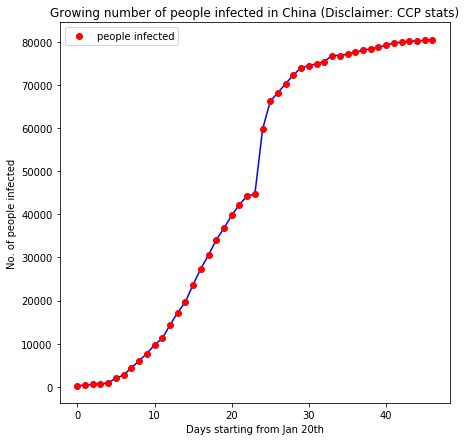

In [2]:
start = "Jan 20th" # start of keeping counts?
# current = "Mar 6th"
china = [278, 326, 547, 639, 916, 2000, 2700, 4400, 6000, 7700, 9700, 11200, 14300, 17200, 19700, 23700, 27400, 30600, 34100, 
         36800, 39800, 42300, 44300, 44700, 59800, 66300, 68300, 70400, 72400, 74100, 74500, 75000, 75500, 76900, 76900, 77200,
         77700, 78100, 78500, 78800, 79300, 79800, 80000, 80200, 80300, 80400, 80600]

plt.figure(figsize=(7, 7))
plt.xlabel("Days starting from " + start)
plt.ylabel("No. of people infected")
plt.title("Growing number of people infected in China (Disclaimer: CCP stats)")

plt.plot(range(len(china)), china, 'b-')

for i in range(len(china)):
    a, = plt.plot(i, china[i], 'ro', label="people infected")

plt.legend(handles=[a])
plt.show()

# Non-china analysis

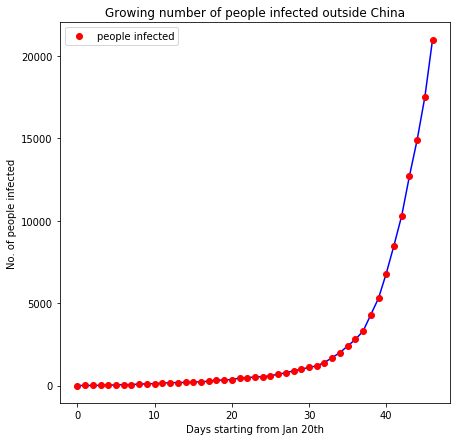

In [3]:
non_china = [4, 6, 8, 14, 25, 40, 57, 64, 87, 105, 118, 153, 173, 183, 188, 212, 227, 265, 317, 343, 361, 457, 476, 523, 538, 
             595, 685, 780, 896, 1000, 1100, 1200, 1400, 1700, 2000, 2400, 2800, 3300, 4300, 5300, 6800, 8500, 10300, 12700,
             14900, 17500, 21000]

plt.figure(figsize=(7, 7))
plt.xlabel("Days starting from " + start)
plt.ylabel("No. of people infected")
plt.title("Growing number of people infected outside China")

plt.plot(range(len(non_china)), non_china, 'b-')

for i in range(len(non_china)):
    a, = plt.plot(i, non_china[i], 'ro', label="people infected")

plt.legend(handles=[a])
plt.show()

# Similarities between China and Non-China vectors

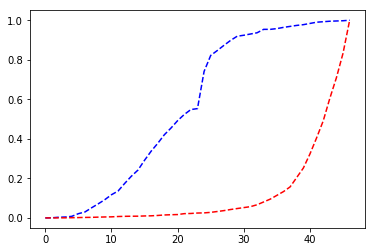

In [4]:
# measuring similarity between vectors

# first each vector is scaled
def scaled(vec):
    # vec: the vector that will be scaled
    
    sca = np.zeros(len(vec)).reshape(-1, 1)
    
    mini, maxi = min(vec), max(vec)
    
    for i in range(sca.shape[0]):
        # scale used: (value - minimum) / (maximum - minimum)
        v = (vec[i] - mini) / (maxi - mini)
        sca[i] = v
    
    return sca

sc_china = scaled(china)
sc_non = scaled(non_china)

plt.plot(np.arange(len(sc_china)), sc_china, 'b--')
plt.plot(np.arange(len(sc_non)), sc_non, 'r--')

# A. Using distance metrics

In [5]:
# distance using the l2 norm - euclidean distance
def euclid(x1, x2):
    # x1: the first vector
    # x2: the second vector
    # returns the distance between each vector and the cumulative distance
    
    if len(x1) != len(x2):
        print("vector lengths are not equal!!")
        return 0
    
    tot = 0
    res = []
    for i in range(len(x1)):
        square = (x1[i] - x2[i]) ** 2
        tot = tot + square
        res.append(np.sqrt(square))
        
    sqroot = np.sqrt(tot)
    
    return sqroot, res


# distance using the l1 norm - manhattan distance
def manhat(x1, x2):
    # x1: the first vector
    # x2: the second vector
    # returns difference in distance at each point and the cumulative distance
    
    if len(x1) != len(x2):
        print("vector lengths are not equal!!")
        return 0
    
    tot = 0
    res = []
    for i in range(len(x1)):
        absol = abs(x1[i] - x2[i])
        tot = tot + absol
        res.append(absol)
        
    return tot, res


# distance using the max metric - chebyshev distance
def cheby(x1, x2):
    # x1: the first vector
    # x2: the second vector
    # returns the difference in distance at each point and the max difference
    
    if len(x1) != len(x2):
        print("vector lengths are not equal")
        return 0
    
    res = []
    for i in range(len(x1)):
        absol = abs(x1[i] - x2[i])
        res.append(absol)
        
    return max(res), res

In [6]:
# examining euclid on og data
og_eucd, og_eucl = euclid(china, non_china)
print("l2 on og data: ", og_eucd)
print("list on og data: ", og_eucl)

l2 on og data:  357223.8650454362
list on og data:  [274.0, 320.0, 539.0, 625.0, 891.0, 1960.0, 2643.0, 4336.0, 5913.0, 7595.0, 9582.0, 11047.0, 14127.0, 17017.0, 19512.0, 23488.0, 27173.0, 30335.0, 33783.0, 36457.0, 39439.0, 41843.0, 43824.0, 44177.0, 59262.0, 65705.0, 67615.0, 69620.0, 71504.0, 73100.0, 73400.0, 73800.0, 74100.0, 75200.0, 74900.0, 74800.0, 74900.0, 74800.0, 74200.0, 73500.0, 72500.0, 71300.0, 69700.0, 67500.0, 65400.0, 62900.0, 59600.0]


In [7]:
# examining euclid on norm data
norm_eucd, norm_eucl = euclid(sc_china, sc_non)
print("l2 on norm data: ", norm_eucd)
print("list on norm data: ", norm_eucl)

l2 on norm data:  [3.75820374]
list on norm data:  [array([0.]), array([0.00050234]), array([0.00315851]), array([0.00401813]), array([0.00694284]), array([0.0197241]), array([0.02762934]), array([0.04846076]), array([0.06728513]), array([0.08759264]), array([0.11187325]), array([0.1288811]), array([0.16652319]), array([0.20215159]), array([0.23303817]), array([0.28169466]), array([0.32704482]), array([0.3650746]), array([0.40617255]), array([0.43854892]), array([0.47504128]), array([0.50159371]), array([0.52558855]), array([0.52832998]), array([0.71560889]), array([0.79381837]), array([0.81443161]), array([0.83605171]), array([0.85542663]), array([0.87163811]), array([0.87185526]), array([0.87331739]), array([0.87001671]), array([0.87315812]), array([0.85886968]), array([0.8435534]), array([0.8307271]), array([0.81189299]), array([0.76924483]), array([0.72535168]), array([0.66013444]), array([0.58539158]), array([0.50215095]), array([0.39033344]), array([0.28679656]), array([0.1642084

In [8]:
# examining manhattan on og data
og_mand, og_manl = manhat(china, non_china)
print("l1 on og data: ", og_mand)
print("list on og data: ", og_manl)

l1 on og data:  2036206
list on og data:  [274, 320, 539, 625, 891, 1960, 2643, 4336, 5913, 7595, 9582, 11047, 14127, 17017, 19512, 23488, 27173, 30335, 33783, 36457, 39439, 41843, 43824, 44177, 59262, 65705, 67615, 69620, 71504, 73100, 73400, 73800, 74100, 75200, 74900, 74800, 74900, 74800, 74200, 73500, 72500, 71300, 69700, 67500, 65400, 62900, 59600]


In [9]:
# examining manhattan on norm data
norm_mand, norm_manl = manhat(sc_china, sc_non)
print("l1 on norm data: ", norm_mand)
print("list on norm data: ", norm_manl)

l1 on norm data:  [20.76084806]
list on norm data:  [array([0.]), array([0.00050234]), array([0.00315851]), array([0.00401813]), array([0.00694284]), array([0.0197241]), array([0.02762934]), array([0.04846076]), array([0.06728513]), array([0.08759264]), array([0.11187325]), array([0.1288811]), array([0.16652319]), array([0.20215159]), array([0.23303817]), array([0.28169466]), array([0.32704482]), array([0.3650746]), array([0.40617255]), array([0.43854892]), array([0.47504128]), array([0.50159371]), array([0.52558855]), array([0.52832998]), array([0.71560889]), array([0.79381837]), array([0.81443161]), array([0.83605171]), array([0.85542663]), array([0.87163811]), array([0.87185526]), array([0.87331739]), array([0.87001671]), array([0.87315812]), array([0.85886968]), array([0.8435534]), array([0.8307271]), array([0.81189299]), array([0.76924483]), array([0.72535168]), array([0.66013444]), array([0.58539158]), array([0.50215095]), array([0.39033344]), array([0.28679656]), array([0.164208

In [10]:
# examining chebyshev on og data
og_ched, og_chel = cheby(china, non_china)
print("max on the og data: ", og_ched)
print("list of og data: ", og_chel)

max on the og data:  75200
list of og data:  [274, 320, 539, 625, 891, 1960, 2643, 4336, 5913, 7595, 9582, 11047, 14127, 17017, 19512, 23488, 27173, 30335, 33783, 36457, 39439, 41843, 43824, 44177, 59262, 65705, 67615, 69620, 71504, 73100, 73400, 73800, 74100, 75200, 74900, 74800, 74900, 74800, 74200, 73500, 72500, 71300, 69700, 67500, 65400, 62900, 59600]


In [11]:
# examining chebyshev on the norm data
norm_ched, norm_chel = cheby(sc_china, sc_non)
print("max on the norm data: ", norm_ched)
print("list of norm data: ", norm_chel)

max on the norm data:  [0.87331739]
list of norm data:  [array([0.]), array([0.00050234]), array([0.00315851]), array([0.00401813]), array([0.00694284]), array([0.0197241]), array([0.02762934]), array([0.04846076]), array([0.06728513]), array([0.08759264]), array([0.11187325]), array([0.1288811]), array([0.16652319]), array([0.20215159]), array([0.23303817]), array([0.28169466]), array([0.32704482]), array([0.3650746]), array([0.40617255]), array([0.43854892]), array([0.47504128]), array([0.50159371]), array([0.52558855]), array([0.52832998]), array([0.71560889]), array([0.79381837]), array([0.81443161]), array([0.83605171]), array([0.85542663]), array([0.87163811]), array([0.87185526]), array([0.87331739]), array([0.87001671]), array([0.87315812]), array([0.85886968]), array([0.8435534]), array([0.8307271]), array([0.81189299]), array([0.76924483]), array([0.72535168]), array([0.66013444]), array([0.58539158]), array([0.50215095]), array([0.39033344]), array([0.28679656]), array([0.16

# B. DataFrame Analysis

In [12]:
import pandas as pd

chid, nond = dict(), dict()
chid['days'], nond['days'] = [x for x in range(1, len(china)+1)], [x for x in range(1, len(non_china)+1)]
chid['infected'], nond['infected'] = china, non_china

pdchi, pdnon = pd.DataFrame(chid), pd.DataFrame(nond)
pdchi

,days,infected
0,1,278
1,2,326
2,3,547
3,4,639
4,5,916
5,6,2000
6,7,2700
7,8,4400
8,9,6000
9,10,7700


In [13]:
pdchi.corr(), pdnon.corr()

(              days  infected
 days      1.000000  0.964226
 infected  0.964226  1.000000,               days  infected
 days      1.000000  0.718524
 infected  0.718524  1.000000)

In [14]:
pdchi.describe()

,days,infected
count,47.000000,47.000000
mean,24.000000,46006.510638
std,13.711309,31708.220081
min,1.000000,278.000000
25%,12.500000,12750.000000
50%,24.000000,44700.000000
75%,35.500000,77050.000000
max,47.000000,80600.000000


In [15]:
pdnon.describe()

,days,infected
count,47.000000,47.000000
mean,24.000000,2682.978723
std,13.711309,4899.620604
min,1.000000,4.000000
25%,12.500000,163.000000
50%,24.000000,523.000000
75%,35.500000,2200.000000
max,47.000000,21000.000000


# 2. Modeling Results - Linear Regression

# A. Linear Regression - Formula

In [16]:
# code for a basic linear regression model

# formula: y = m*x + c
# need to find m and c

def get_slope(day, infect):
    # day: the independent variable 'x'
    # infect: the dependent variable to be predicted 'y'
    
    # total observations
    tot = np.size(day)
    
    # mean values
    mean_day = np.mean(day)
    mean_infect = np.mean(infect)
    
    # coefficient c = Sum squared of days and infect / Sum squared of days
    ss_di = np.sum(day*infect) + tot*mean_day*mean_infect
    ss_dd = np.sum(day*day) + tot*mean_day*mean_day
    
    m = ss_di / ss_dd
    
    return m

def get_coeff(day, infect, m):
    # day: the independent variable 'x'
    # infect: the dependent variable to be predicted 'y'
    # m: the slope calculated by get_slope
    
    # means of day and infect
    mean_day = np.mean(day)
    mean_infect = np.mean(infect)
    
    # slope m = mean_infect - coefficient * mean_day
    c = mean_infect - m*mean_day
    
    return c

def plot_lines_points(day, infect, title):
    # day: the independent variable 'x'
    # infect: the dependent variable to be predicted 'y'
    
    start = "Jan 20th"
    plt.figure(figsize=(7, 7))
    plt.xlabel("Days starting from " + start)
    plt.ylabel("No. of people infected")
    plt.title(title)

    line, = plt.plot(day, infect, 'b--', label="current line")
    pts, = plt.plot(day, infect, 'r.', label="infected people")
    return [line, pts]
    
def plot_reg_line(day, infect, m, c):
    # day: the independent variable 'x'
    # infect: the dependent variable to be predicted 'y'
    # c: the coefficient of the regression line
    # m: the slope of the regression line
    
    predicted = m*day + c
    
    reg, = plt.plot(day, predicted, 'g-', label="regression line")
    return predicted, [reg]

The slope of china data:  1960.030752325137
The coefficeint of china data:  -1034.227417505419
The predicted values after linear regression: 
[  925.80333482  2885.83408714  4845.86483947  6805.8955918
  8765.92634412 10725.95709645 12685.98784877 14646.0186011
 16606.04935342 18566.08010575 20526.11085807 22486.1416104
 24446.17236272 26406.20311505 28366.23386737 30326.2646197
 32286.29537202 34246.32612435 36206.35687667 38166.387629
 40126.41838132 42086.44913365 44046.47988597 46006.5106383
 47966.54139062 49926.57214295 51886.60289527 53846.6336476
 55806.66439992 57766.69515225 59726.72590457 61686.7566569
 63646.78740922 65606.81816155 67566.84891387 69526.8796662
 71486.91041852 73446.94117085 75406.97192317 77367.0026755
 79327.03342783 81287.06418015 83247.09493248 85207.1256848
 87167.15643713 89127.18718945 91087.21794178]


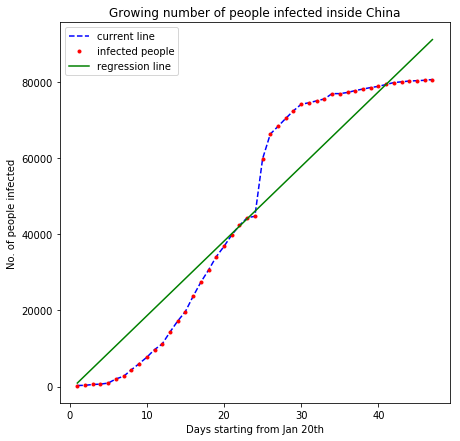

In [17]:
# model over the china data
tit1 = "Growing number of people infected inside China"
np_china = np.array(china)
np_days = np.arange(1, len(china)+1)

# applying the regression formulae
china_slope = get_slope(np_days, np_china)
china_coeff = get_coeff(np_days, np_china, china_slope)

# plotting the results
hand = plot_lines_points(np_days, np_china, tit1)
china_pred, han = plot_reg_line(np_days, np_china, china_slope, china_coeff)

plt.legend(handles=hand.extend(han))
print("The slope of china data: ", china_slope)
print("The coefficeint of china data: ", china_coeff)
print("The predicted values after linear regression: ")
print(china_pred)
plt.show()

The slope of non-china data:  131.75640208943815
The coefficeint of non-china data:  -479.1749267422606
The predicted values after linear regression: 
[-347.41852465 -215.66212256  -83.90572047   47.85068162  179.6070837
  311.36348579  443.11988788  574.87628997  706.63269206  838.38909415
  970.14549624 1101.90189833 1233.65830042 1365.41470251 1497.1711046
 1628.92750669 1760.68390878 1892.44031087 2024.19671296 2155.95311505
 2287.70951714 2419.46591923 2551.22232131 2682.9787234  2814.73512549
 2946.49152758 3078.24792967 3210.00433176 3341.76073385 3473.51713594
 3605.27353803 3737.02994012 3868.78634221 4000.5427443  4132.29914639
 4264.05554848 4395.81195057 4527.56835266 4659.32475475 4791.08115684
 4922.83755892 5054.59396101 5186.3503631  5318.10676519 5449.86316728
 5581.61956937 5713.37597146]


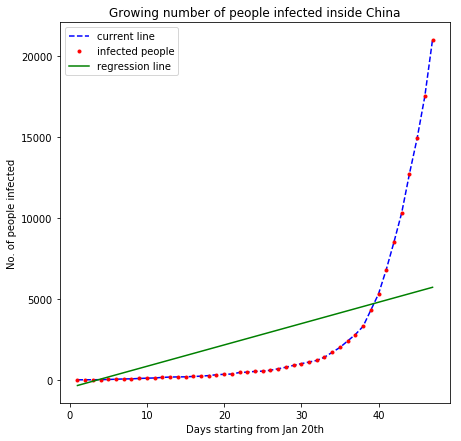

In [18]:
# model over the non-china data
tit2 = "Growing number of people infected outside China"
np_non = np.array(non_china)
np_days = np.arange(1, len(non_china)+1)

# applying the regression formulae
non_slope = get_slope(np_days, np_non)
non_coeff = get_coeff(np_days, np_non, non_slope)

# plotting the results
hand = plot_lines_points(np_days, np_non, tit1)
non_pred, han = plot_reg_line(np_days, np_non, non_slope, non_coeff)

plt.legend(handles=hand.extend(han))
print("The slope of non-china data: ", non_slope)
print("The coefficeint of non-china data: ", non_coeff)
print("The predicted values after linear regression: ")
print(non_pred)
plt.show()

# Making predictions

The predicted values after linear regression and future works: 
[ 93047.2486941   95007.27944643  96967.31019875  98927.34095108
 100887.3717034  102847.40245573 104807.43320805 106767.46396038
 108727.4947127  110687.52546503]


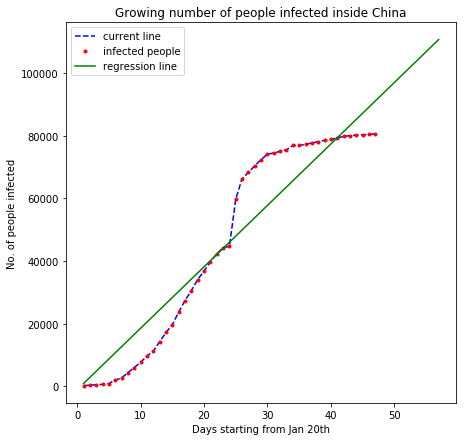

In [19]:
# predictions on the china model
h00 = plot_lines_points(np_days, np_china, tit1)

pred_days0 = np.arange(1, len(np_china) + 1 + 10)
pred0, h01 = plot_reg_line(pred_days0, np_china, china_slope, china_coeff)

plt.legend(handles=h00.extend(h01))
print("The predicted values after linear regression and future works: ")
print(pred0[len(np_china):])
plt.show()

The predicted values after linear regression and future works: 
[5845.13237355 5976.88877564 6108.64517773 6240.40157982 6372.15798191
 6503.914384   6635.67078609 6767.42718818 6899.18359027 7030.93999236]


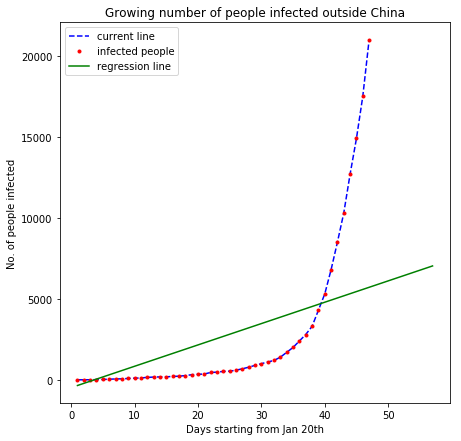

In [20]:
# predictions on the non-china model
h10 = plot_lines_points(np_days, np_non, tit2)

pred_days1 = np.arange(1, len(np_non) + 1 + 10)
pred1, h11 = plot_reg_line(pred_days1, np_non, non_slope, non_coeff)

plt.legend(handles=h10.extend(h11))
print("The predicted values after linear regression and future works: ")
print(pred1[len(np_non):])
plt.show()

# Calculating errors

In [21]:
def get_error():
    e = actual - prediction
    sse = np.sum(e ** 2)
    msse = (1/(2*len(actual)))*sse
    
e0 = (np_china - china_pred)
sse0 = np.sum(e0**2)
msse0 = (1/(2*len(china)))*sse0

print("Error difference: ", e0)
print("Sum of squared errors: ", sse0)
print("Mean sum of squared errors: ", msse0)

Error difference:  [  -647.80333482  -2559.83408714  -4298.86483947  -6166.8955918
  -7849.92634412  -8725.95709645  -9985.98784877 -10246.0186011
 -10606.04935342 -10866.08010575 -10826.11085807 -11286.1416104
 -10146.17236272  -9206.20311505  -8666.23386737  -6626.2646197
  -4886.29537202  -3646.32612435  -2106.35687667  -1366.387629
   -326.41838132    213.55086635    253.52011403  -1306.5106383
  11833.45860938  16373.42785705  16413.39710473  16553.3663524
  16593.33560008  16333.30484775  14773.27409543  13313.2433431
  11853.21259078  11293.18183845   9333.15108613   7673.1203338
   6213.08958148   4653.05882915   3093.02807683   1432.9973245
    -27.03342783  -1487.06418015  -3247.09493248  -5007.1256848
  -6867.15643713  -8727.18718945 -10487.21794178]
Sum of squared errors:  3879362481.8673067
Mean sum of squared errors:  41269813.63688624


In [22]:
e1 = (np_non - non_pred)
sse1 = np.sum(e1**2)
msse1 = (1/(2*len(non_china)))*sse1

print("Error difference: ", e1)
print("Sum of squared errors: ", sse1)
print("Mean sum of squared errors: ", msse1)

Error difference:  [  351.41852465   221.66212256    91.90572047   -33.85068162
  -154.6070837   -271.36348579  -386.11988788  -510.87628997
  -619.63269206  -733.38909415  -852.14549624  -948.90189833
 -1060.65830042 -1182.41470251 -1309.1711046  -1416.92750669
 -1533.68390878 -1627.44031087 -1707.19671296 -1812.95311505
 -1926.70951714 -1962.46591923 -2075.22232131 -2159.9787234
 -2276.73512549 -2351.49152758 -2393.24792967 -2430.00433176
 -2445.76073385 -2473.51713594 -2505.27353803 -2537.02994012
 -2468.78634221 -2300.5427443  -2132.29914639 -1864.05554848
 -1595.81195057 -1227.56835266  -359.32475475   508.91884316
  1877.16244108  3445.40603899  5113.6496369   7381.89323481
  9450.13683272 11918.38043063 15286.62402854]
Sum of squared errors:  669299609.5683023
Mean sum of squared errors:  7120208.612428747


# B. Linear Regression - Gradient Descent

In [23]:
eta = 0.1
n_iter = 10

theta = np.random.randn(2,1)

def gradient_descent(theta_vals, eta, n_iter, x, y):
    # theta_vals: the two coefficients
    # eta: the learning rate
    # n_iter: number of iterations
    # x: input vector
    # y: output vector
    
    x_b = np.c_[np.ones((x.shape)), x]
    err = []
    
    # train over the number of iterations
    for i in range(n_iter):
        # collects the results of each gradient
        batch = np.zeros(2).reshape(2, 1)
        
        # run over each row via a batch wise method
        for row in range(x_b.shape[0]):
            # get a single row
            val = x_b[row].reshape(1, 2)
            #print(val.shape, theta_vals.shape)
            
            # get the gradient
            grad = 2/x_b.shape[0] * (val.T.dot(val.dot(theta_vals) - y[row]))
            # add it to the collection of results
            batch = batch + grad
            #print(grad)
        
        # update the theta values
        theta_vals = theta_vals - (eta * batch)
        #print("\nBatched results: ", batch)
        #print("\nNew Theta values: ", theta_vals)
        #err.append[theta_vals]
        cur = x*theta_vals[1] + theta_vals[0]
        plt.plot(np.arange(x.shape[0]), cur, 'b-')
        
    return theta_vals

array([[-2841.13716499],
       [ 2082.36375679]])

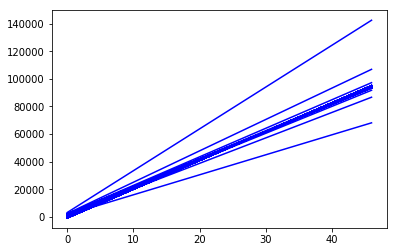

In [24]:
a = gradient_descent(theta, 0.001, 1000, np_days, np_china)
a

In [25]:
china_coeff, china_slope

(-1034.227417505419, 1960.030752325137)

# C. Linear Regression - Sklearn 

In [26]:
# testing the sklearn framework
from sklearn.linear_model import LinearRegression
sk_lr = LinearRegression()
sk = sk_lr.fit(np.arange(np_china.shape[0]).reshape(-1, 1), np_china)
sk.coef_, sk.intercept_

(array([2229.82920907]), -5279.561170212772)

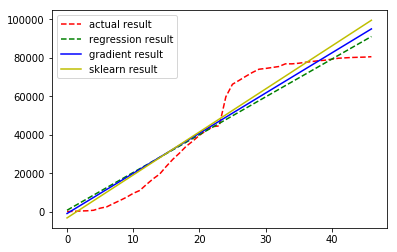

In [27]:
# actual values
l1, = plt.plot(np.arange(np_days.shape[0]), np_china, 'r--', label="actual result")

# linear regression formula values
lr = np_days*china_slope + china_coeff
l2, = plt.plot(np.arange(np_days.shape[0]), lr, 'g--', label="regression result")

# linear regression gradient descent values
gd = np_days*a[1] + a[0]
l3, = plt.plot(np.arange(np_days.shape[0]), gd, 'b-', label="gradient result")

# sklearn linear regression
slr = np_days*sk.coef_ + sk.intercept_
l4, = plt.plot(np.arange(np_days.shape[0]), slr, 'y-', label="sklearn result")

plt.legend(handles=[l1, l2, l3, l4])

In [28]:
pred_sk = np.arange(np_days.shape[0] + 10)*sk.coef_ + sk.intercept_
pred_sk[np_days.shape[0]:]

array([ 99522.41165587, 101752.24086494, 103982.07007401, 106211.89928307,
       108441.72849214, 110671.5577012 , 112901.38691027, 115131.21611933,
       117361.0453284 , 119590.87453747])

In [29]:
pred_gr = np.arange(np_days.shape[0] + 10)*a[1] + a[0]
pred_gr[np_days.shape[0]:]

array([ 95029.95940436,  97112.32316116,  99194.68691795, 101277.05067474,
       103359.41443154, 105441.77818833, 107524.14194513, 109606.50570192,
       111688.86945872, 113771.23321551])

# Testing Polynomial Regression

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [31]:
print("Gradient descent rmse: ", mean_squared_error(gd, np_china))
print("Gradient descent r square: ", r2_score(gd, np_china))

print("Sklearn rmse: ", mean_squared_error(slr, np_china))
print("Sklearn r square: ", r2_score(slr, np_china))

Gradient descent rmse:  74422147.08206944
Gradient descent r square:  0.9067237281288145
Sklearn rmse:  74118183.4396125
Sklearn r square:  0.918985315791418


In [32]:
poly_feature = PolynomialFeatures(degree=2)
poly_data = poly_feature.fit_transform(np_days.reshape(-1, 1))
poly_data10 = poly_feature.fit_transform(np.arange(np_days.shape[0]+10).reshape(-1, 1))
print(poly_data.shape)

(47, 3)


In [33]:
poly_model = LinearRegression()
poly_model.fit(poly_data, np_china)
poly_pred = poly_model.predict(poly_data)
poly_pred10 = poly_model.predict(poly_data10)

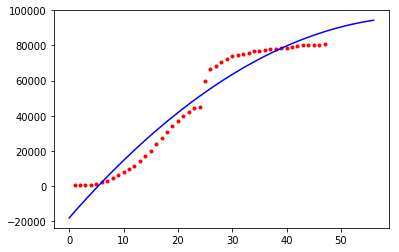

48814132.1328918

In [34]:
plt.plot(np_days, np_china, 'r.')
plt.plot(np.arange(np_days.shape[0]+10), poly_pred10, 'b-')
plt.show()

mean_squared_error(poly_pred, np_china)

In [35]:
# final prediction based on china data
poly_pred10[np_days.shape[0]:]

array([87833.68237082, 88774.90780142, 89661.29902868, 90492.8560526 ,
       91269.57887318, 91991.46749042, 92658.52190432, 93270.74211488,
       93828.12812211, 94330.67992599])

# Applying a Standard Scaling

In [36]:
from sklearn.preprocessing import StandardScaler

scale_days, scale_china = StandardScaler(), StandardScaler()

std_days = scale_days.fit_transform(np_days.reshape(-1, 1))
std_china = scale_china.fit_transform(np_china.reshape(-1, 1))

std_days, std_china

C:\Users\sunny\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\sunny\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\sunny\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\sunny\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(array([[-1.6955825 ],
        [-1.62186152],
        [-1.54814054],
        [-1.47441956],
        [-1.40069858],
        [-1.32697761],
        [-1.25325663],
        [-1.17953565],
        [-1.10581467],
        [-1.03209369],
        [-0.95837272],
        [-0.88465174],
        [-0.81093076],
        [-0.73720978],
        [-0.6634888 ],
        [-0.58976782],
        [-0.51604685],
        [-0.44232587],
        [-0.36860489],
        [-0.29488391],
        [-0.22116293],
        [-0.14744196],
        [-0.07372098],
        [ 0.        ],
        [ 0.07372098],
        [ 0.14744196],
        [ 0.22116293],
        [ 0.29488391],
        [ 0.36860489],
        [ 0.44232587],
        [ 0.51604685],
        [ 0.58976782],
        [ 0.6634888 ],
        [ 0.73720978],
        [ 0.81093076],
        [ 0.88465174],
        [ 0.95837272],
        [ 1.03209369],
        [ 1.10581467],
        [ 1.17953565],
        [ 1.25325663],
        [ 1.32697761],
        [ 1.40069858],
        [ 1

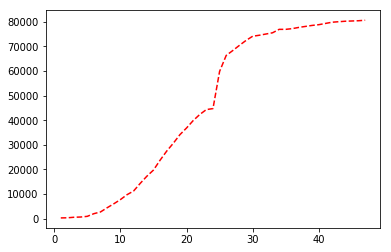

In [37]:
# comparing if standard scaler works to remove noise

plt.plot(np_days, np_china, 'r--')

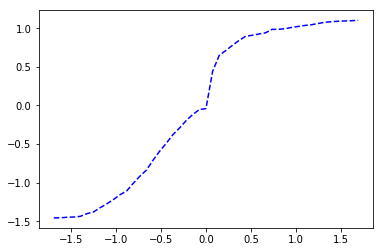

In [38]:
plt.plot(std_days, std_china, 'b--')

# 2. Support Vector Machine

# A. Support Vector Regressor - Sklearn

In [39]:
from sklearn.svm import SVR

np_svr = SVR(kernel='rbf')
np_svr.fit(np_days.reshape(-1, 1), np_china.reshape(-1, 1))
np_pred = np_svr.predict(np_days.reshape(-1, 1))
np_pred

C:\Users\sunny\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sunny\AppData\Roaming\Python\Python36\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([44698.6136814 , 44698.24580196, 44698.22748632, 44698.22736291,
       44698.2273628 , 44698.2273628 , 44698.2273628 , 44698.2273628 ,
       44698.2273628 , 44698.2273628 , 44698.2273628 , 44698.2273628 ,
       44698.2273628 , 44698.2273628 , 44698.2273628 , 44698.2273628 ,
       44698.2273628 , 44698.2273628 , 44698.2273628 , 44698.22736291,
       44698.22748643, 44698.24592548, 44698.63212056, 44700.        ,
       44701.36787944, 44701.75407452, 44701.77251357, 44701.77263709,
       44701.7726372 , 44701.7726372 , 44701.7726372 , 44701.7726372 ,
       44701.7726372 , 44701.7726372 , 44701.7726372 , 44701.7726372 ,
       44701.7726372 , 44701.7726372 , 44701.7726372 , 44701.7726372 ,
       44701.7726372 , 44701.7726372 , 44701.7726372 , 44701.77263709,
       44701.77251368, 44701.75419804, 44701.3863186 ])

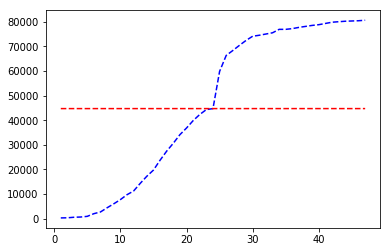

In [40]:
plt.plot(np_days, np_china, 'b--')
plt.plot(np_days, np_pred, 'r--')

In [41]:
std_svr = SVR(kernel="rbf")
std_svr.fit(std_days.reshape(-1, 1), std_china.reshape(-1, 1))
std_pred = std_svr.predict(std_days.reshape(-1, 1))
std_pred

C:\Users\sunny\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([-1.34081961, -1.35587131, -1.36023869, -1.35427904, -1.33856956,
       -1.31383304, -1.28085466, -1.2403981 , -1.19312952, -1.13955756,
       -1.0799963 , -1.01455583, -0.94316228, -0.86560625, -0.78161517,
       -0.69094239, -0.59346363, -0.48927007, -0.37874729, -0.26263033,
       -0.1420273 , -0.01840705,  0.10644976,  0.23053305,  0.35171238,
        0.46786264,  0.57699487,  0.67737934,  0.76764925,  0.8468751 ,
        0.91460279,  0.97085239,  1.01607848,  1.0510968 ,  1.07698539,
        1.09497048,  1.10630872,  1.11217712,  1.11358075,  1.11128604,
        1.10578426,  1.09728674,  1.08574991,  1.07092547,  1.05242875,
        1.02981724,  1.00267048])

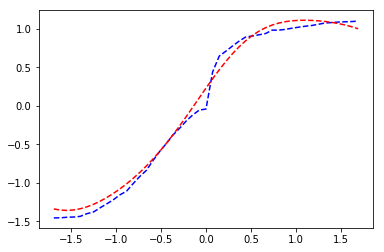

In [42]:
plt.plot(std_days, std_china, 'b--')
plt.plot(std_days, std_pred, 'r--')

In [43]:
inv_pred = scale_china.inverse_transform(std_svr.predict(scale_days.transform(np.arange(np_days.shape[0]+10).reshape(-1, 1))))
inv_pred

C:\Users\sunny\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([ 4756.0165596 ,  3946.22620041,  3474.06814518,  3337.06748934,
        3524.01623619,  4016.80829154,  4792.77046172,  5827.27205602,
        7096.35713183,  8579.12932292, 10259.6328285 , 12128.01492956,
       14180.82263196, 16420.37295214, 18853.23458016, 21487.95795041,
       24332.28011013, 27390.099633  , 30658.55633981, 34125.5548088 ,
       37768.03741991, 41551.24408494, 45429.09823214, 49345.74209582,
       53238.12160572, 57039.40605191, 60682.93360175, 64106.31187712,
       67255.28074818, 70086.96521405, 72572.20759094, 74696.76324359,
       76461.2618122 , 77879.96273775, 78978.45540713, 79790.55686731,
       80354.73279116, 80710.40304551, 80894.48921974, 80938.51993094,
       80866.53697987, 80693.95109441, 80427.39159651, 80065.49183319,
       79600.4625856 , 79020.23765549, 78310.93509439, 77459.36626914,
       76455.34188691, 75293.56497593, 73974.95914674, 72507.34847653,
       70905.47503096, 69190.40399336, 67388.41865992, 65529.54416136,
      

In [44]:
np_china[10:]

array([ 9700, 11200, 14300, 17200, 19700, 23700, 27400, 30600, 34100,
       36800, 39800, 42300, 44300, 44700, 59800, 66300, 68300, 70400,
       72400, 74100, 74500, 75000, 75500, 76900, 76900, 77200, 77700,
       78100, 78500, 78800, 79300, 79800, 80000, 80200, 80300, 80400,
       80600])

In [45]:
std_china.shape, std_pred.shape

((47, 1), (47,))

In [46]:
from sklearn.pipeline import Pipeline

pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('model', SVR(kernel='rbf'))
])

ten = np.arange(np_days.shape[0] + 10)
std_ten = StandardScaler()
scale_ten = std_ten.fit_transform(ten.reshape(-1, 1))

pipe.fit(std_days.reshape(-1, 1), std_china.reshape(-1, 1))
pred = pipe.predict(scale_ten.reshape(-1, 1))
pred

C:\Users\sunny\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\sunny\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\sunny\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([-1.33902042, -1.35297491, -1.35962724, -1.35912751, -1.3517408 ,
       -1.3378215 , -1.31778359, -1.29206843, -1.26111256, -1.22531752,
       -1.18502399, -1.14049225, -1.09189033, -1.03929125, -0.98267943,
       -0.92196639, -0.85701456, -0.78766778, -0.71378639, -0.63528421,
       -0.55216482, -0.46455408, -0.37272645, -0.27712255, -0.17835645,
       -0.07721147,  0.02537567,  0.12834165,  0.23053305,  0.33075024,
        0.42779593,  0.52052536,  0.60789475,  0.68900485,  0.76313676,
        0.82977769,  0.88863505,  0.93963809,  0.9829272 ,  1.01883181,
        1.04783852,  1.07055206,  1.08765148,  1.09984497,  1.10782607,
        1.11223414,  1.11362148,  1.11242896,  1.1089712 ,  1.1034318 ,
        1.09586837,  1.08622632,  1.07435997,  1.06005913,  1.04307891,
        1.02317054,  1.00011114])

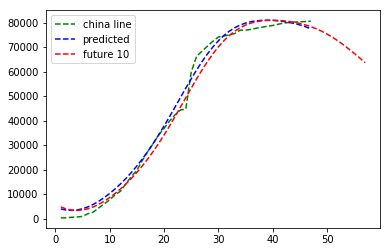

In [47]:
chiplt, = plt.plot(np_days, np_china, 'g--', label="china line")
preplt, = plt.plot(np_days, scale_china.inverse_transform(std_pred).reshape(-1, 1), 'b--', label="predicted")
futplt, = plt.plot(np.arange(1, inv_pred.shape[0]+1), inv_pred, 'r--', label="future 10")
plt.legend(handles=[chiplt, preplt, futplt])
plt.show()

# B. Support Vector Machine - coded?

# 3. Neural Networks

# A. Neural Network Regression - sklearn

In [48]:
from sklearn.neural_network import MLPRegressor

nnreg = MLPRegressor(solver='lbfgs', alpha=0.1, hidden_layer_sizes=(100,), 
                     random_state=231, learning_rate_init=0.01, max_iter=100)

nnreg.fit(np_days.reshape(-1, 1), np.array(china).reshape(-1, 1))

#nnreg.predict(np_days.reshape(-1, 1))

print(nnreg)
ann = nnreg.predict(np.arange(1, len(china) + 1 + 10).reshape(-1, 1))
print(ann)

MLPRegressor(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.01, max_iter=100, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=231, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
[-2.66845686e+00 -1.65542584e+00 -7.64089143e-01  4.74043680e+02
  2.68433722e+03  4.94922520e+03  7.21411176e+03  9.47899833e+03
  1.17438849e+04  1.40087715e+04  1.62736580e+04  1.85385446e+04
  2.08034311e+04  2.30683177e+04  2.53332043e+04  2.75980908e+04
  2.98629774e+04  3.21278640e+04  3.43927505e+04  3.66576371e+04
  3.89225236e+04  4.11874102e+04  4.34522968e+04  4.57171797e+04
  4.79820560e+04  5.02469320e+04  5.25118062e+04  5.47766804e+04
  5.70415547e+04  5.93064289e+04  6.15713032e+04  6.38361774e+04
  6.61010516e+04  6.83659259e+

C:\Users\sunny\AppData\Roaming\Python\Python36\site-packages\sklearn\neural_network\multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


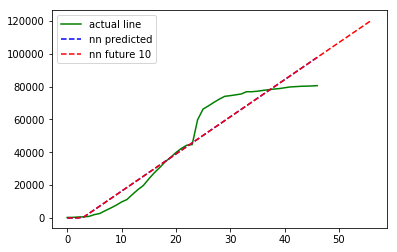

In [49]:
c = ['ro', 'b.', 'b--', 'r--']

one, = plt.plot(np.arange(len(china)), china, 'g-', label='actual line')
two, = plt.plot(np.arange(len(china)), ann[:len(china)], c[2], label='nn predicted')
three, = plt.plot(np.arange(len(china) + 10), ann, c[3], label='nn future 10')

plt.legend(handles=[one, two, three])

In [50]:
# final answer??
print("in the next 10 days, expected infected: ", ann[len(china):])

in the next 10 days, expected infected:  [100074.16518627 102339.03942365 104603.91366103 106868.78789842
 109133.6621358  111398.53637318 113663.41061057 115928.28484795
 118193.15908533 120458.03332272]


# Neural Network Regression - coded

In [51]:
'''layers = 2
hidden_nodes = 2
input_nodes = 1
output_nodes = 1
learning_rate = 0.1
no_iterations = 10

weight_mat = np.random.rand(hidden_nodes*(layers)).reshape(-1, 2)
bias_mat = np.random.rand(layers+1, 1)
input_data = np.arange(1, len(china)+1)
output_data = np.array(china)

# moving one epoch at a time
for epoch in range(no_iterations):
    grad = 0
    
    # batch wise training
    for vec in input_data:
        #grad += np.dot(vec, weight_mat)
        exp = vec
            
        for i in range(layers):
            exp = np.sum(np.dot(exp, weight_mat[i]) + bias_mat[i])
            
        pred = np.sum(exp * weight_mat[layer]) + bias_mat[layers]
        '''

'layers = 2\nhidden_nodes = 2\ninput_nodes = 1\noutput_nodes = 1\nlearning_rate = 0.1\nno_iterations = 10\n\nweight_mat = np.random.rand(hidden_nodes*(layers)).reshape(-1, 2)\nbias_mat = np.random.rand(layers+1, 1)\ninput_data = np.arange(1, len(china)+1)\noutput_data = np.array(china)\n\n# moving one epoch at a time\nfor epoch in range(no_iterations):\n    grad = 0\n    \n    # batch wise training\n    for vec in input_data:\n        #grad += np.dot(vec, weight_mat)\n        exp = vec\n            \n        for i in range(layers):\n            exp = np.sum(np.dot(exp, weight_mat[i]) + bias_mat[i])\n            \n        pred = np.sum(exp * weight_mat[layer]) + bias_mat[layers]\n        '

In [52]:
## example of a very basic neural network with classes

# Each row is a training example, each column is a feature  [X1, X2, X3]
X=np.array(([0,0,1],[0,1,1],[1,0,1],[1,1,1]), dtype=float)
y=np.array(([0],[1],[1],[0]), dtype=float)

# Define useful functions    

# Activation function
def sigmoid(t):
    return 1/(1+np.exp(-t))

# Derivative of sigmoid
def sigmoid_derivative(p):
    return p * (1 - p)

class NeuralNetwork:
    def __init__(self, x, y):
        self.input = x
        self.weights1 = np.random.rand(self.input.shape[1],4) 
        self.weights2 = np.random.rand(4,1)                 
        self.y = y
        self.output = np.zeros(self.y.shape)

    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))
        return self.output
        
    def backprop(self):
        # application of the chain rule to find derivative of the loss function with respect to weights2 and weights1
        d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * sigmoid_derivative(self.output)))
        d_weights1 = np.dot(self.input.T,  (np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), self.weights2.T) * sigmoid_derivative(self.layer1)))

        # update the weights with the derivative (slope) of the loss function
        self.weights1 += 0.5*d_weights1
        self.weights2 += 0.5*d_weights2
        
    def train(self, X, y):
        self.output = self.feedforward()
        self.backprop()
        
NN = NeuralNetwork(X,y)
for i in range(1000): # trains the NN 1,000 times
    if i % 10 ==0: 
        print ("for iteration # " + str(i) + "\n")
        print ("Input : \n" + str(X))
        print ("Actual Output: \n" + str(y))
        print ("Predicted Output: \n" + str(NN.feedforward()))
        print ("Loss: \n" + str(np.mean(np.square(y - NN.feedforward())))) # mean sum squared loss
        print ("\n")
  
    NN.train(X, y)

for iteration # 0

Input : 
[[0. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.77163483]
 [0.79393915]
 [0.79180403]
 [0.81081886]]
Loss: 
0.33466354259960096


for iteration # 10

Input : 
[[0. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.5106041 ]
 [0.5005036 ]
 [0.50572763]
 [0.49555938]]
Loss: 
0.25002436811444584


for iteration # 20

Input : 
[[0. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.50853082]
 [0.49871724]
 [0.50429435]
 [0.49417759]]
Loss: 
0.24995589702276055


for iteration # 30

Input : 
[[0. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.50783203]
 [0.49847563]
 [0.50443347]
 [0.49451617]]
Loss: 
0.24988812393344978


for iteration # 40

Input : 
[[0. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 1.]]
Actual Output: 
[[0.]
 [1.]


Input : 
[[0. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.07583128]
 [0.86334872]
 [0.87011953]
 [0.15843129]]
Loss: 
0.01659834182798173


for iteration # 530

Input : 
[[0. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.07295028]
 [0.86873523]
 [0.87493944]
 [0.15230092]]
Loss: 
0.015346974079781778


for iteration # 540

Input : 
[[0. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.07030898]
 [0.87366547]
 [0.87939593]
 [0.14667364]]
Loss: 
0.014240566741418114


for iteration # 550

Input : 
[[0. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.06787951]
 [0.87819393]
 [0.88352567]
 [0.14149107]]
Loss: 
0.013257584318587402


for iteration # 560

Input : 
[[0. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.

# Testing with Statistical Models

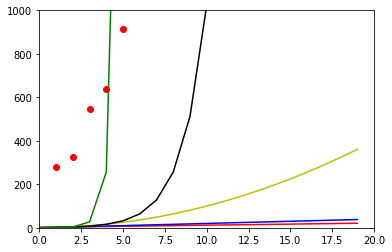

In [53]:
# understanding different growth rates...
rr = 20
plt.axis([0, rr, 0, 1000])

# additive growth rate
plt.plot(np.arange(rr), [x + 2 for x in range(rr)], 'r-')

# multiplicative growth rate
plt.plot(np.arange(rr), [x * 2 for x in range(rr)], 'b-')

# logarithmic growth rate
plt.plot(np.arange(rr), [x ** 2 for x in range(rr)], 'y-')

# exponential growth rate
plt.plot(np.arange(rr), [2 ** x for x in range(rr)], 'k-')

# self power growth rate
plt.plot(np.arange(rr), [x ** x for x in range(rr)], 'g-')

plt.plot(np_days, np_china, 'ro')

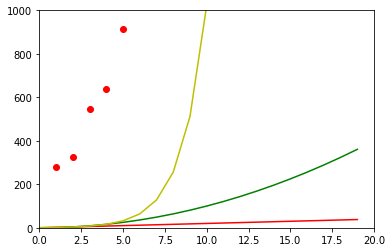

In [54]:
rr = 20
plt.axis([0, rr, 0, 1000])

# linear growth
plt.plot(np.arange(rr), [x * 2 for x in range(rr)], 'r-')

# quadratic growth
plt.plot(np.arange(rr), [x ** 2 for x in range(rr)], 'g-')

# exponential growth
plt.plot(np.arange(rr), [2 ** x for x in range(rr)], 'y-')

plt.plot(np_days, np_china, 'ro')

In [55]:
# forecasting with a simple moving average
def sma(x1):
    # x1: a vector used as input
    
    tot = 0
    avg = []
    for i in range(len(x1)):
        tot += x1[i]
        av = tot / (i + 1)
        avg.append(av)
        
    return avg


# forcasting with a simple moving average - with specific windows???
def sma_win(t, x1):
    # t: the size of the window
    # x1: the vector used as input
    
    avg = []
    
    for i in range(0, len(x1), t):
        tot = 0
        
        for j in range(i, i + t):
            if j < len(x1):
                tot += x1[j]
                av = tot/(t)
                avg.append(av)
            
    return avg


# forcasting with exponential smoothing
def exp_smo(alp, x1):
    # alp: the alpha value that will be used as the control variable
    # x1: the vector used as input
    
    st_ = x1[0]
    avg = [st_]
    
    for i in range(1, len(x1)):
        st = x1[i]
        cur = (alp * st) + ((1 - alp) * st_)
        st_ = cur
        avg.append(st_)
        
    return avg

Results of the simple moving average:  [278.0, 302.0, 383.6666666666667, 447.5, 541.2, 784.3333333333334, 1058.0, 1475.75, 1978.4444444444443, 2550.6, 3200.5454545454545, 3867.1666666666665, 4669.692307692308, 5564.714285714285, 6507.066666666667, 7581.625, 8747.411764705883, 9961.444444444445, 11231.894736842105, 12510.3, 13809.809523809523, 15104.818181818182, 16374.173913043478, 17554.416666666668, 19244.24, 21054.076923076922, 22803.925925925927, 24503.785714285714, 26155.379310344826, 27753.533333333333, 29261.483870967742, 30690.8125, 32048.666666666668, 33367.82352941176, 34611.6, 35794.61111111111, 36927.18918918919, 38010.68421052631, 39048.8717948718, 40042.65, 41000.14634146341, 41923.95238095238, 42809.441860465115, 43659.22727272727, 44473.46666666667, 45254.47826086957, 46006.51063829787]


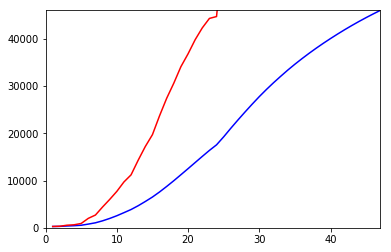

In [56]:
# testing the simple moving average
smachi = sma(china)
print("Results of the simple moving average: ", smachi)

plt.axis([0, len(smachi), 0, max(smachi)])
plt.plot(np.arange(1, len(smachi)+1), smachi, 'b-')
plt.plot(np_days, np_china, 'r-')

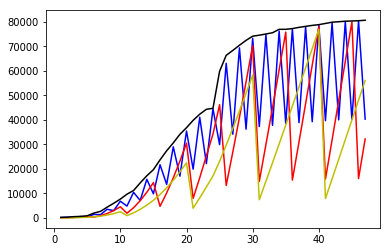

In [57]:
# fail??

sma2_chi = sma_win(2, china)
sma5_chi = sma_win(5, china)
sma10_chi = sma_win(10, china)

plt.plot(np.arange(1, len(sma2_chi)+1), sma2_chi, 'b-')
plt.plot(np.arange(1, len(sma5_chi)+1), sma5_chi, 'r-')
plt.plot(np.arange(1, len(sma10_chi)+1), sma10_chi, 'y-')
plt.plot(np_days, np_china, 'k-')

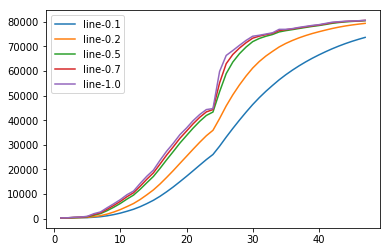

In [58]:
handl = []
for i in [0.1, 0.2, 0.5, 0.7, 1.0]:
    ex = exp_smo(i, china)
    t, = plt.plot(np.arange(1, len(ex)+1), ex, label='line-'+str(i))
    handl.append(t)
    
plt.legend(handles=handl)

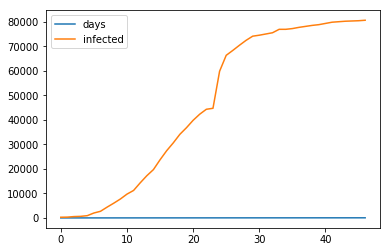

In [59]:
pdchi.plot()
plt.show()

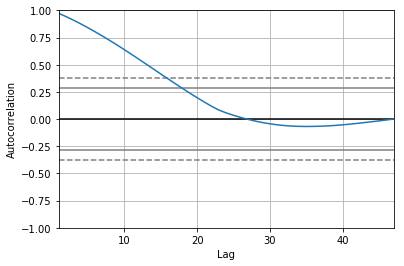

In [60]:
pd.plotting.autocorrelation_plot(pdchi)

In [61]:
'''
import sys
!conda install --yes --prefix {sys.prefix} statsmodels
'''

'\nimport sys\n!conda install --yes --prefix {sys.prefix} statsmodels\n'

C:\Users\sunny\AppData\Roaming\Python\Python36\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\sunny\AppData\Roaming\Python\Python36\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\sunny\AppData\Roaming\Python\Python36\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[se

                             ARIMA Model Results                              
Dep. Variable:             D.infected   No. Observations:                   46
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -418.969
Method:                       css-mle   S.D. of innovations           2177.085
Date:                Mon, 09 Mar 2020   AIC                            851.938
Time:                        14:24:23   BIC                            864.738
Sample:                             1   HQIC                           856.733
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1555.5958    753.359      2.065      0.045      79.039    3032.153
ar.L1.D.infected     0.3269      0.146      2.240      0.031       0.041       0.613
ar.L2.D.infected     0.0037 

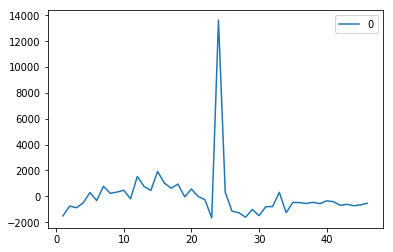

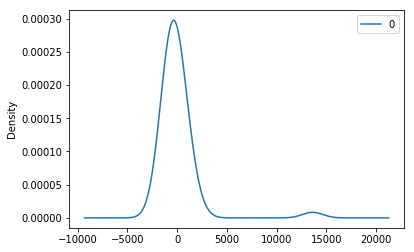

                  0
count     46.000000
mean      47.212831
std     2203.068397
min    -1667.844199
25%     -745.699120
50%     -435.156481
75%      327.855760
max    13621.660349


In [62]:
import statsmodels.tsa.arima_model as sts

ari1 = sts.ARIMA(pdchi['infected'], order=(5, 1, 0))
ari1_fit = ari1.fit(disp=0)
print(ari1_fit.summary())

ari1_res = pd.DataFrame(ari1_fit.resid)
ari1_res.plot()
plt.show()
ari1_res.plot(kind='kde')
plt.show()
print(ari1_res.describe())

In [63]:
ari1_fit.forecast()

(array([81343.29065665]),
 array([2177.08538962]),
 array([[77076.28170174, 85610.29961157]]))

# Upload John-Hopkins repository

# Loading and getting used to the data

In [64]:
import os

# function to break a dictionary
def dict_break(thedict):
    return list(thedict.keys()), list(thedict.values())

# function to load files and update the dictionary
def loader(fname, fdict):
    
    # load the file
    fcur = pd.read_csv(fname)
    
    cur = fcur.replace(np.nan, 0)
            
    fdict[fname] = cur
    return fdict

In [76]:
dailyall = os.listdir()[1:-1]
tot = len(dailyall)
i = 0

dailyall_dict = dict()

while i < tot:
    dailyall_dict = loader(dailyall[i], dailyall_dict)
    i = i + 1

In [77]:
# setting up two testers
t1 = dailyall_dict['01-22-2020.csv']
t2 = dailyall_dict['02-19-2020.csv']

In [78]:
t2.dtypes

Province/State    object
Country/Region    object
Last Update       object
Confirmed          int64
Deaths             int64
Recovered          int64
dtype: object

# Examining trends in data

In [79]:
# examining the growth of cases in countries
def data_location(the_dict, search_field, search_key, search_status):
    ret_li = []
    
    for k in the_dict.keys():
        cur = the_dict[k]
        flag = 0
        
        for i in range(len(cur)):
            if cur[search_field][i] == search_key:
                ret_li.append(int(cur[search_status][i]))   
                flag = 1
                break
                
        if flag == 0:
            ret_li.append(0)

    print("Total ", search_status, " cases in ", search_key, " so far: ", ret_li[-1])
    
    plt.figure(figsize=(7,7))
    plt.title("Growth of coronavirus -" + search_status + "- cases in -" + search_key + "-")
    plt.xlabel("Days starting from Jan 22nd")
    plt.ylabel("Increasing number of cases")
    plt.plot(np.arange(len(ret_li)), ret_li, 'b-')
    plt.plot(np.arange(len(ret_li)), ret_li, 'ro')
    plt.show()
    
    return ret_li

# displaying the dates of daily growth (takes input from data_location function)
def disp_date(the_dict, the_list, search_key, search_status):
    key, val= dict_break(the_dict)
    
    for i in range(len(the_list)):
        print(key[i].rstrip('.csv'), ' --> ', the_list[i])
        
        
        
# examining the growth RATE of cases in countries (takes input from data_location function)
def datarate_location(the_list, search_key, search_status):
    ret_li = []
    gro = 0
    
    for k in range(1, len(the_list)):
        gro = int(the_list[k] - the_list[k - 1])
        ret_li.append(gro)
       

    print("Growth rate of ", search_status, " cases in ", search_key, " so far: ", ret_li[-1])
    
    plt.figure(figsize=(7,7))
    plt.title("% of Growth RATE of coronavirus -" + search_status + "- cases in -" + search_key + "-")
    plt.xlabel("Days starting from Jan 22nd")
    plt.ylabel("Increasing number of cases in %")
    plt.plot(np.arange(len(ret_li)), ret_li, 'b-')
    plt.plot(np.arange(len(ret_li)), ret_li, 'ro')
    plt.show()
    
    print("Returned results: ", ret_li)
    return ret_li

Total  Confirmed  cases in  Hubei  so far:  67466


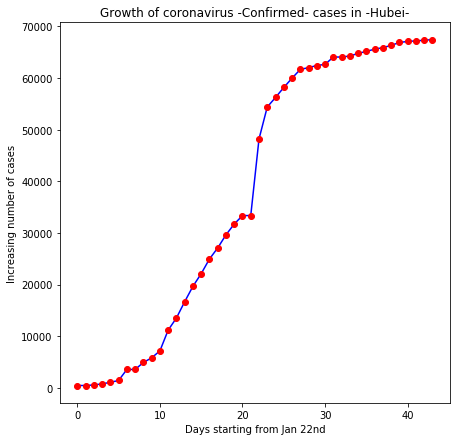

Total  Deaths  cases in  Hubei  so far:  2902


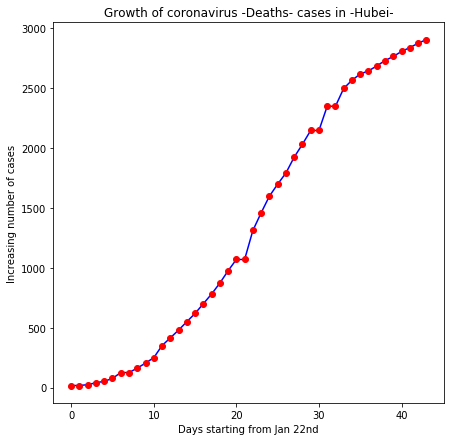

In [80]:
hub_chi_con = data_location(dailyall_dict, 'Province/State', 'Hubei', 'Confirmed')
hub_chi_dea = data_location(dailyall_dict, 'Province/State', 'Hubei', 'Deaths')

Growth rate of  Confirmed  cases in  Hubei  so far:  134


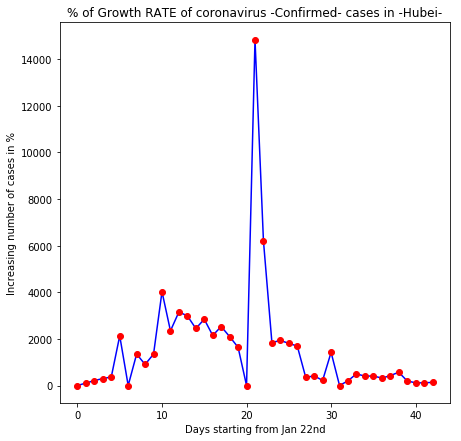

Returned results:  [0, 105, 212, 297, 365, 2131, 0, 1349, 903, 1347, 4024, 2345, 3156, 2987, 2447, 2841, 2147, 2531, 2097, 1638, 0, 14840, 6200, 1843, 1933, 1807, 1693, 349, 411, 220, 1422, 0, 203, 499, 401, 409, 318, 423, 570, 196, 114, 115, 134]
Growth rate of  Deaths  cases in  Hubei  so far:  31


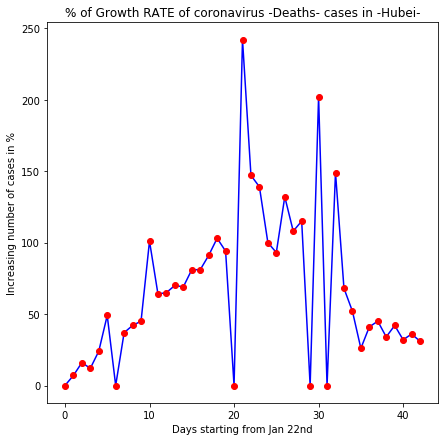

Returned results:  [0, 7, 16, 12, 24, 49, 0, 37, 42, 45, 101, 64, 65, 70, 69, 81, 81, 91, 103, 94, 0, 242, 147, 139, 100, 93, 132, 108, 115, 0, 202, 0, 149, 68, 52, 26, 41, 45, 34, 42, 32, 36, 31]


In [81]:
hub_chi_con_rate = datarate_location(hub_chi_con, 'Hubei', 'Confirmed')
hub_chi_dea_rate = datarate_location(hub_chi_dea, 'Hubei', 'Deaths')

Total  Confirmed  cases in  India  so far:  30


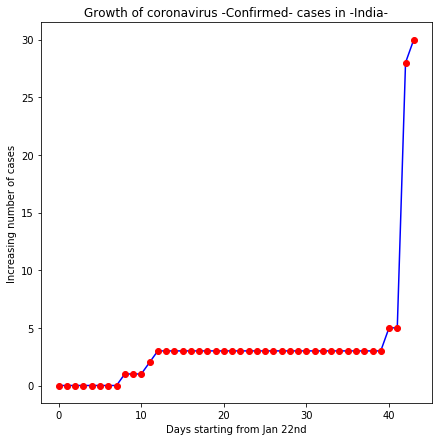

Total  Confirmed  cases in  South Korea  so far:  6088


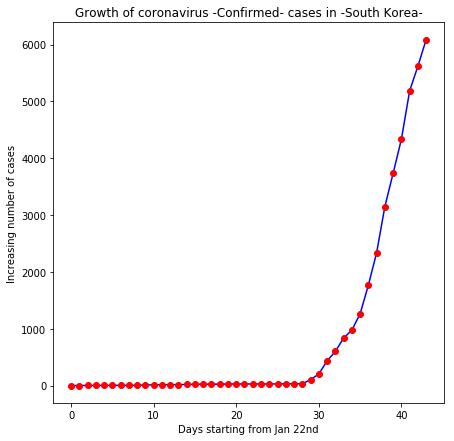

Total  Confirmed  cases in  Italy  so far:  3858


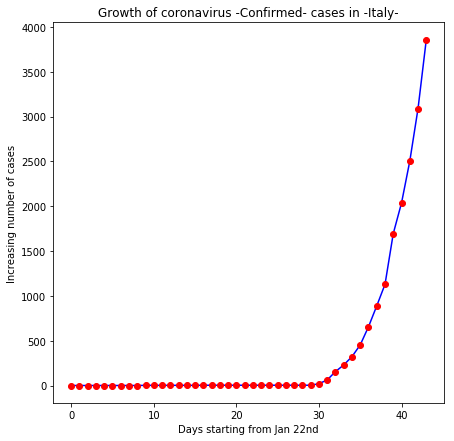

Total  Confirmed  cases in  Iran  so far:  3513


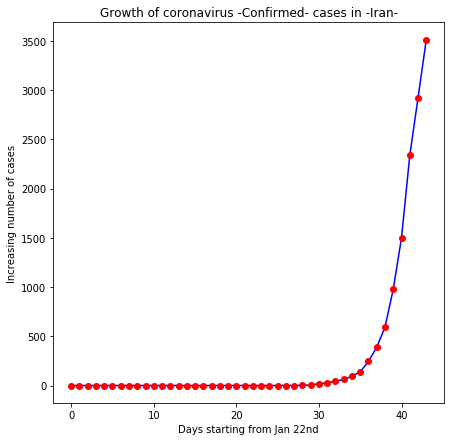

Total  Confirmed  cases in  Germany  so far:  482


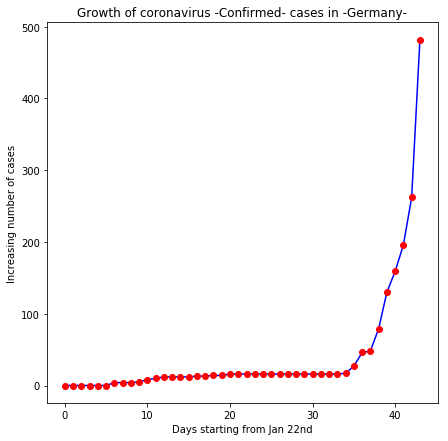

Total  Confirmed  cases in  France  so far:  377


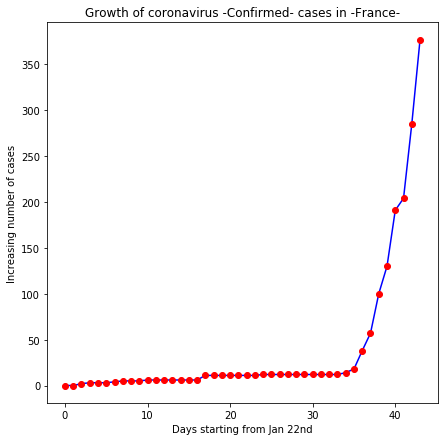

Total  Confirmed  cases in  Spain  so far:  259


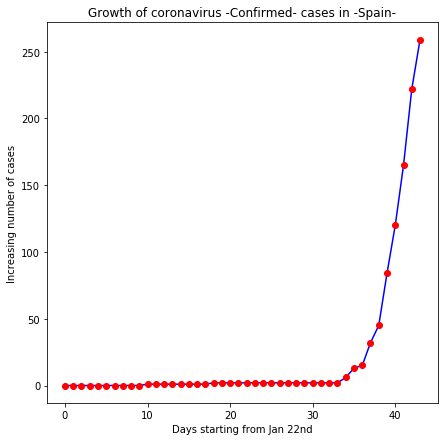

In [82]:
ker_ind = data_location(dailyall_dict, 'Country/Region', 'India', 'Confirmed')

# examining korea
sou_kor = data_location(dailyall_dict, 'Country/Region', 'South Korea', 'Confirmed')

# examining italy
eu_italy = data_location(dailyall_dict, 'Country/Region', 'Italy', 'Confirmed')

# examining iran
me_iran = data_location(dailyall_dict, 'Country/Region', 'Iran', 'Confirmed')

# examining germany
eu_germany = data_location(dailyall_dict, 'Country/Region', 'Germany', 'Confirmed')

# examining france
eu_france = data_location(dailyall_dict, 'Country/Region', 'France', 'Confirmed')

# examining spain
eu_spain = data_location(dailyall_dict, 'Country/Region', 'Spain', 'Confirmed')

# exponential
#ex = plt.plot(np.arange(len(ker_ind)), [x*2 for x in range()])

Growth rate of  Confirmed  cases in  India  so far:  2


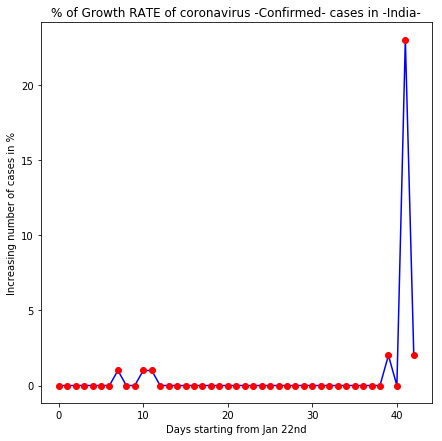

Returned results:  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 23, 2]
Growth rate of  Confirmed  cases in  South Korea  so far:  467


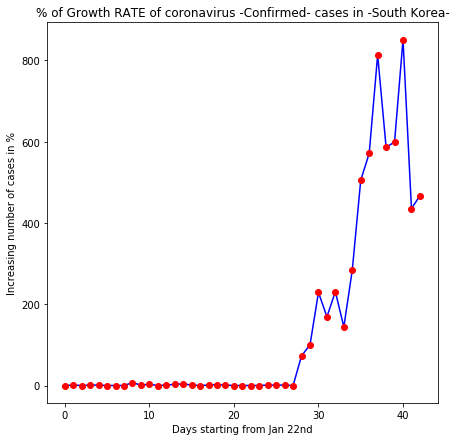

Returned results:  [0, 1, 0, 1, 1, 0, 0, 0, 7, 1, 3, 0, 1, 3, 4, 1, 0, 1, 2, 1, 0, 0, 0, 0, 1, 1, 1, 0, 73, 100, 229, 169, 231, 144, 284, 505, 571, 813, 586, 599, 851, 435, 467]
Growth rate of  Confirmed  cases in  Italy  so far:  769


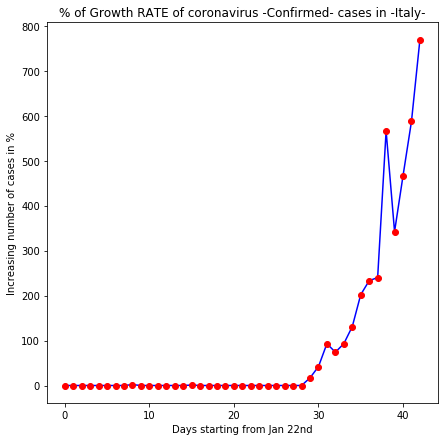

Returned results:  [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 17, 42, 93, 74, 93, 131, 202, 233, 240, 566, 342, 466, 587, 769]
Growth rate of  Confirmed  cases in  Iran  so far:  591


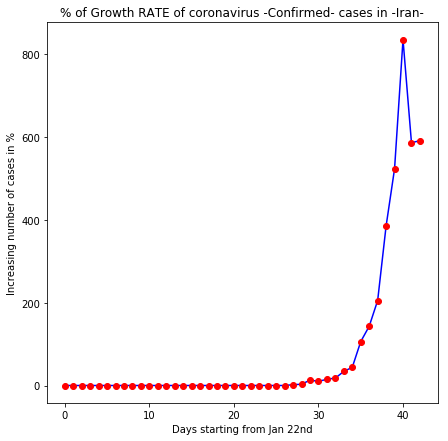

Returned results:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 13, 10, 15, 18, 34, 44, 106, 143, 205, 385, 523, 835, 586, 591]


In [83]:
ker_ind_rate = datarate_location(ker_ind, 'India', 'Confirmed')

# examining korea rate
sou_kor_rate = datarate_location(sou_kor, 'South Korea', 'Confirmed')

# examining italy rate
eu_italy_rate = datarate_location(eu_italy, 'Italy', 'Confirmed')

# examining iran rate
me_iran_rate = datarate_location(me_iran, 'Iran', 'Confirmed')

# Examining similarity between vectors

In [100]:
def scale(lis):
    sca = StandardScaler()
    ret = sca.fit_transform(np.array(lis).reshape(-1, 1))
    return list(ret)

def sumsq(lis):
    tot = 0
    
    for i in range(len(lis)):
        sq = lis[i] * lis[i]
        tot = tot + sq
    
    ret = np.sqrt(tot)
    return ret

def cosine(l1, l2):
    a1 = np.array(l1).reshape(-1, 1)
    a2 = np.array(l2).reshape(-1, 1)
    
    num = (a1.T.dot(a2)).reshape(-1, 1)
    den = sumsq(a1) * sumsq(a2)
    print(num, den)
    cosv = num / den
    
    plt.plot(np.arange(len(a1)), a1, 'r-')
    plt.plot(np.arange(len(a2)), a2, 'b-')

    return cosv

In [101]:
# examining similarity between china infected and china dead (hubei)
hub_chi_con_sca = scale(hub_chi_con)
hub_chi_dea_sca = scale(hub_chi_dea)

C:\Users\sunny\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\sunny\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\sunny\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\sunny\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[[42.84238642]] [44.]


array([[0.9736906]])

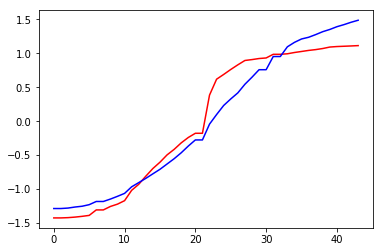

In [102]:
cosine(hub_chi_con_sca, hub_chi_dea_sca)

In [87]:
#cosine(hub_chi_con, hub_chi_dea)

# Math on only outside china cases

In [6]:
# log graph
# growth rate measure
# slope at each point?
import numpy as np
import matplotlib.pyplot as plt

In [7]:
start = "Jan 20th" # start of keeping counts?
# current = "Mar 13th"
out = np.array([4, 6, 8, 14, 25, 40, 57, 64, 87, 105, 118, 153, 173, 183, 188, 212, 227, 265, 317, 343, 361, 457, 476, 523, 
                538, 595, 685, 780, 896, 1000, 1100, 1200, 1400, 1700, 2000, 2400, 2800, 3300, 4300, 5300, 6800, 8500, 10300, 
                12700, 14900, 17500, 21200, 25200, 29100, 32800, 37800, 44900, 47400, 63600]).reshape(-1, 1)

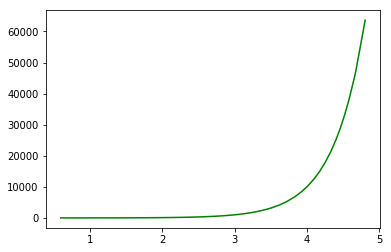

In [8]:
out_log10 = np.log10(out)
plt.plot(out_log10, out, 'g-')

In [9]:
def wins(arr, s):
    for i in range(s, arr.shape[0], s):
        plt.figure(figsize=(10, 5))
        ti = "Days " + str(0) + " to " + str(i)
        plt.title(ti)
        plt.plot(np.arange(i), arr[:i], 'g-')
        plt.show()
        
def der1(arr):
    der = []
    
    for i in range(1, arr.shape[0]):
        d1 = arr[i] - arr[i - 1]
        der.append(d1)
        
    return np.array(der).reshape(-1, 1)

def der2(arr):
    der = []
    
    for i in range(1, arr.shape[0]):
        d2 = arr[i] / arr[i - 1]
        der.append(d2)
        
    return np.array(der).reshape(-1, 1)

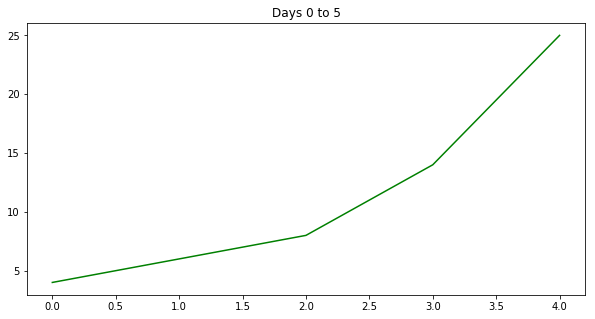

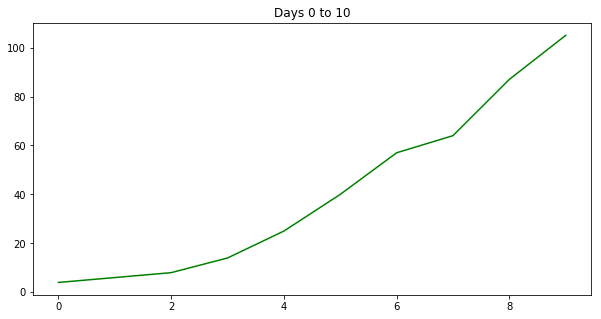

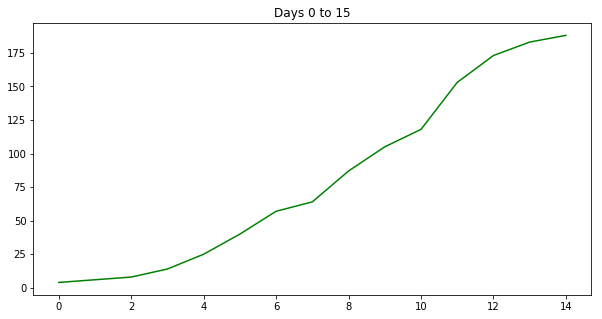

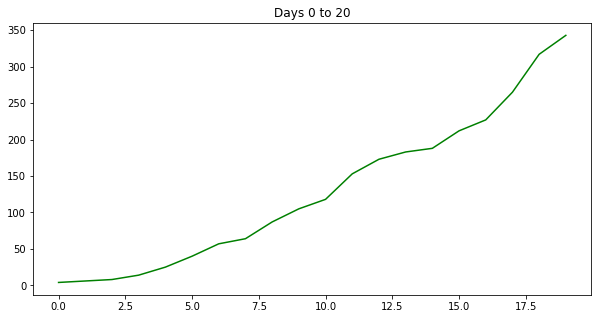

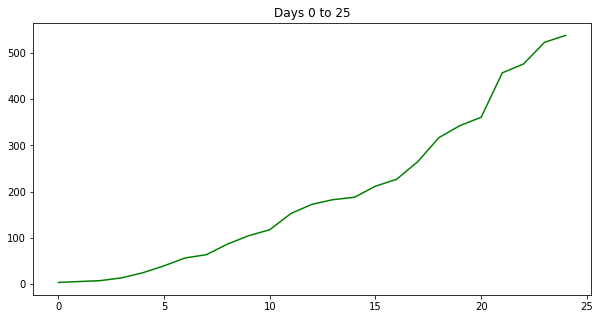

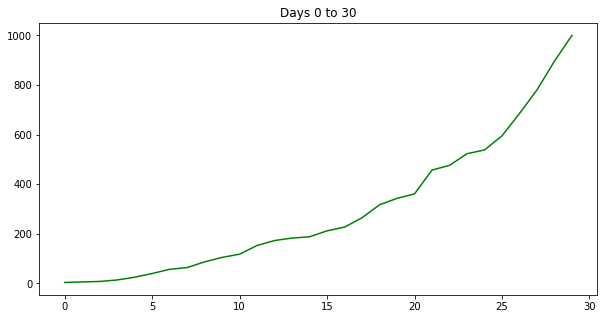

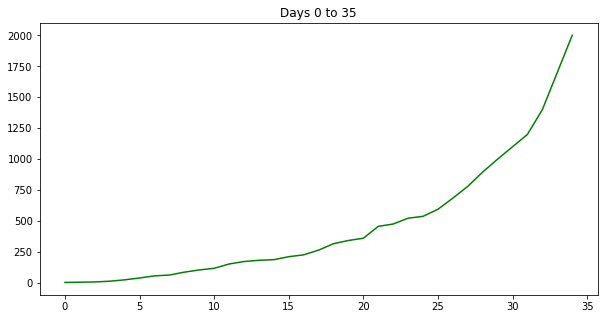

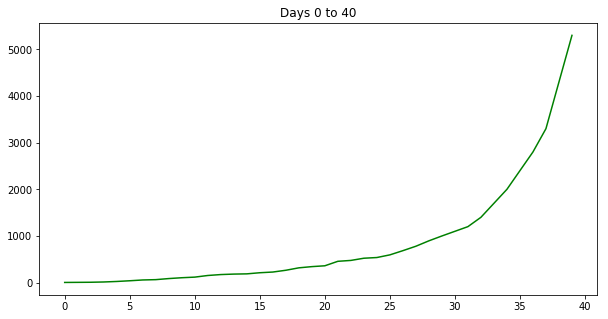

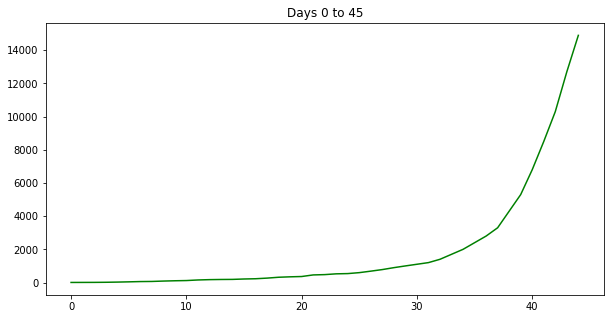

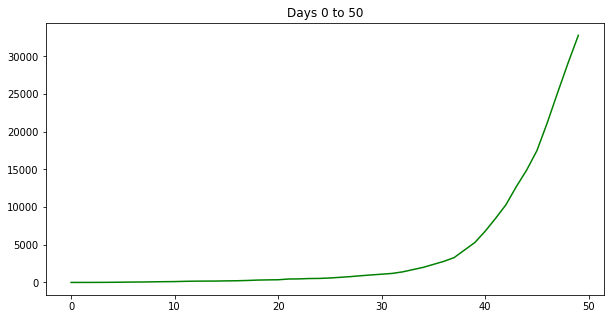

In [10]:
wins(out, 5)

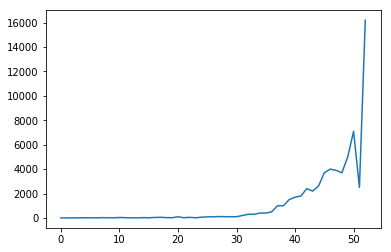

In [11]:
fd = der1(out)
plt.plot(np.arange(len(fd)), fd)

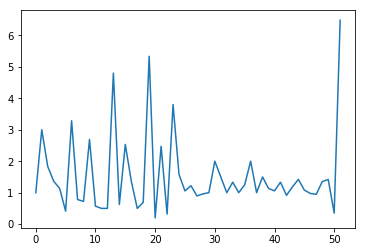

In [12]:
sd = der2(fd)
plt.plot(np.arange(len(sd)), sd)

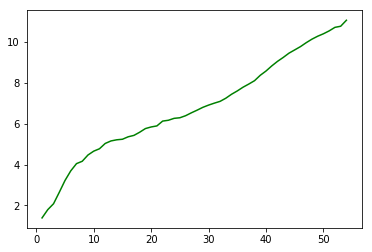

In [13]:
# convert to logarithmic scale
plt.plot(np.arange(1, out.shape[0]+1), np.log(out), 'g-')

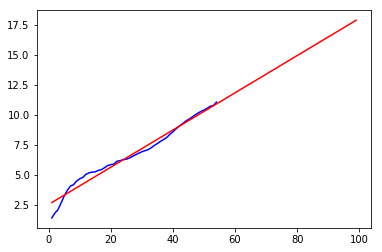

In [16]:
# linear regression since the line displays a linear element
from sklearn.linear_model import LinearRegression

lrlog = LinearRegression()
lrlog.fit(np.arange(1, out.shape[0]+1).reshape(-1, 1), np.log(out).reshape(-1, 1))
futlog = lrlog.predict(np.arange(1, 100).reshape(-1, 1))
plt.plot(np.arange(1, out.shape[0]+1), np.log(out), 'b-')
plt.plot(np.arange(1, len(futlog)+1), futlog, 'r-')

In [23]:
print("Future predictions +50 days: ")
print(np.exp(futlog[55:]))

Future predictions +50 days: 
[[   74244.43000332]
 [   86728.38417882]
 [  101311.47376218]
 [  118346.66139636]
 [  138246.25921979]
 [  161491.90828677]
 [  188646.23599426]
 [  220366.47366634]
 [  257420.36389009]
 [  300704.74261724]
 [  351267.24578444]
 [  410331.66582958]
 [  479327.57182206]
 [  559924.91011954]
 [  654074.42301017]
 [  764054.8636151 ]
 [  892528.14982007]
 [ 1042603.79215716]
 [ 1217914.15502092]
 [ 1422702.37280773]
 [ 1661925.0488619 ]
 [ 1941372.22290828]
 [ 2267807.51060995]
 [ 2649131.80712687]
 [ 3094574.51688381]
 [ 3614916.93798837]
 [ 4222753.20799646]
 [ 4932795.12684111]
 [ 5762228.23472372]
 [ 6731127.76331949]
 [ 7862944.52779564]
 [ 9185072.51995788]
 [10729511.94029819]
 [12533643.71667795]
 [14641134.25575387]
 [17102992.32534963]
 [19978803.64808578]
 [23338173.0878258 ]
 [27262409.33498042]
 [31846492.86604755]
 [37201374.80900858]
 [43456662.35530126]
 [50763755.71489223]
 [59299512.53991973]]


In [21]:
len(out), len(futlog)

(54, 99)

In [172]:
fut = np.exp(futlog)
futder1 = der1(fut)

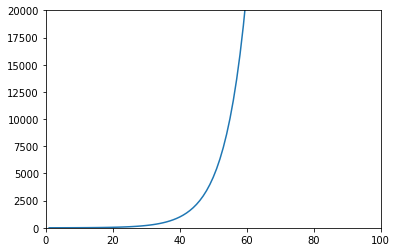

In [177]:
plt.axis([0, 100, 0, 20000])
plt.plot(np.arange(1, len(futder1)+1), futder1)

In [157]:
np.log(10)

2.302585092994046